# 특성 공학과 규제

- 다중회귀 : 여러 개의 특성을 사용한 선형 회귀
- 특성공학 : 각 특성을 곱해서 또 다른 특성을 만드는 작업

## 데이터 준비

In [1]:
# length, height, width 특성을 가지는 perch_full
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
# 타깃 데이터 준비
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
# 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =\
train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기
> 특성을 만들거나 전처리하기 위한 다양한 클래스.
> fit, transform 메소드 제공

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
# 2와 3을 제곱한 4와 9 / 2와 3을 곱한 6
# 선형 방정식의 절편은 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있다.

# 1 없이 (절편 제거)
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]


In [6]:
# 위의 방식으로 train_input에 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [7]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [8]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [10]:
print(lr.score(test_poly, test_target))

0.9714559911594155


In [11]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [12]:
# 위 데이터를 사용해서 다시 훈련
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [13]:
# 훈련 세트에 너무 과대적합되므로 테스트 세트에서 형편없는 점수
print(lr.score(test_poly, test_target))

-144.40744532797535


## 규제
> 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것 (과대적합 방지)

In [14]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
# 표준점수로 변환한 train_scaled와 test_scaled 준비됨.

### 릿지 회귀
> 계수를 제곱한 값을 기준으로 규제를 적용

In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
# 기존 선형 회귀에서 완벽에 가까웠던 점수가 조금 낮아짐. (훈련 세트의 과대적합 방지)

0.9896101671037343


In [16]:
print(ridge.score(test_scaled, test_target))
# 테스트 세트의 점수는 정상으로 돌아옴.

0.9790693977615386


alpha 매개변수로 규제의 강도를 조절할 수 있다.

In [17]:
# alpha 값을 바꿀 때마다 score() 메소드의 결과를 저장할 리스트 생성
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [18]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

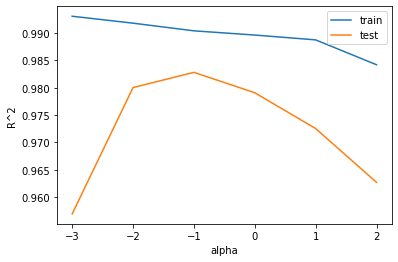

In [19]:
plt.plot(np.log10(alpha_list), train_score, label='train')
plt.plot(np.log10(alpha_list), test_score, label='test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1 (0.1)로 alpha 값 지정

In [20]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


굳!!!

### 라쏘 회귀

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
# 훈련 세트의 결과를 보니 라쏘 회귀 모델도 과대적합을 잘 규제하였음을 확인할 수 있다.

0.989789897208096


In [22]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


Lasso 모델도 alpha 매개변수로 규제의 강도를 조절할 수 있다.

In [23]:
# alpha 값을 바꿀 때마다 score() 메소드의 결과를 저장할 리스트 생성
train_score = []
test_score = []

In [24]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha=alpha, max_iter=100000)
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13930.733964405814, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1439.7980697002204, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


경고가 발생할 수 있다. 사이킷런의 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이런 경고가 발생한다.
이 반복 횟수(max_iter 매개변수의 값)를 충분히 늘리면 오류가 발생하지 않는다.

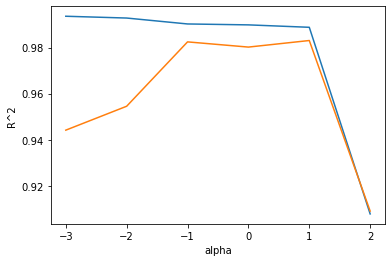

In [25]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

- 위 그래프도 왼쪽은 과대적합, 오른쪽은 크게 과소적합이 일어나고 있다.
- 라쏘 모델에서 최적의 alpha 값은 1, 즉 10^1=1이다.

In [26]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695
